## Import scCASE and the dependencies.

scCASE is available on PyPI and can be installed via

In [1]:
#pip install scCASE 

You can also install scCASE from GitHub via

In [2]:
# git clone git://github.com/BioX-NKU/scCASE.git
# cd scCASE
# python setup.py install

The following packages are used in this tutorial.

In [1]:
import scCASE
import pandas as pd
import episcanpy as epi
import anndata as ad
import numpy as np
import sklearn.metrics
from sklearn.decomposition import PCA,TruncatedSVD
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Check data

Calculate sequencing depth for each cell

2023-12-30 13:11:49.519220: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-30 13:11:49.551485: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-30 13:11:49.551533: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-30 13:11:49.551561: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-30 13:11:49.558819: I tensorflow/core/platform/cpu_feature_g

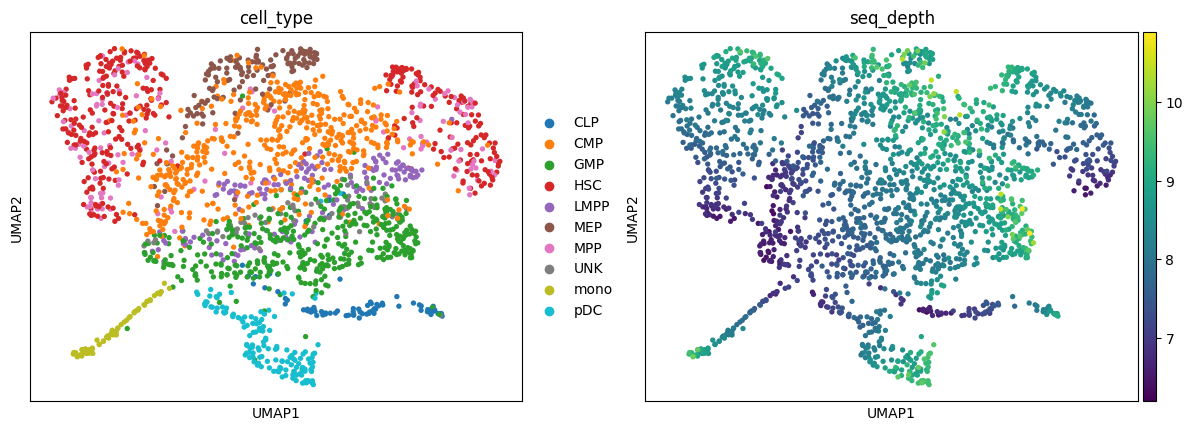

In [4]:
adata = epi.read("/home/sccasimp/data/sccasimp/blood/origdata.h5ad")
seq_depth = np.sum(adata.X>0,axis = 1)
adata.obs["seq_depth"] = np.log(seq_depth)
scCASE.lazy(adata)
epi.pl.umap(adata,color = ["cell_type","seq_depth"])

## Run scCASE

scCASE can reduce the impact of sequencing depth on data.

In [5]:
data_imputed = scCASE.run("/home/sccasimp/data/sccasimp/blood/origdata.h5ad",data_format="h5ad",method= "scCASE")
data_imputed.obs["seq_depth"] = np.log(seq_depth)

Data shape after feature selection:
(108972, 2034)
Raw dataset shape:  (2034, 108972)
Dataset shape after preprocessing:  (2034, 100934)
Estimating by sum of squared distances...
Estimating by Davies-Bouldin score...
Estimating by silhouette coefficient...
Initializing...
Generating similarity matrix...
Updating...
Finished


In [6]:
scCASE.lazy(data_imputed)

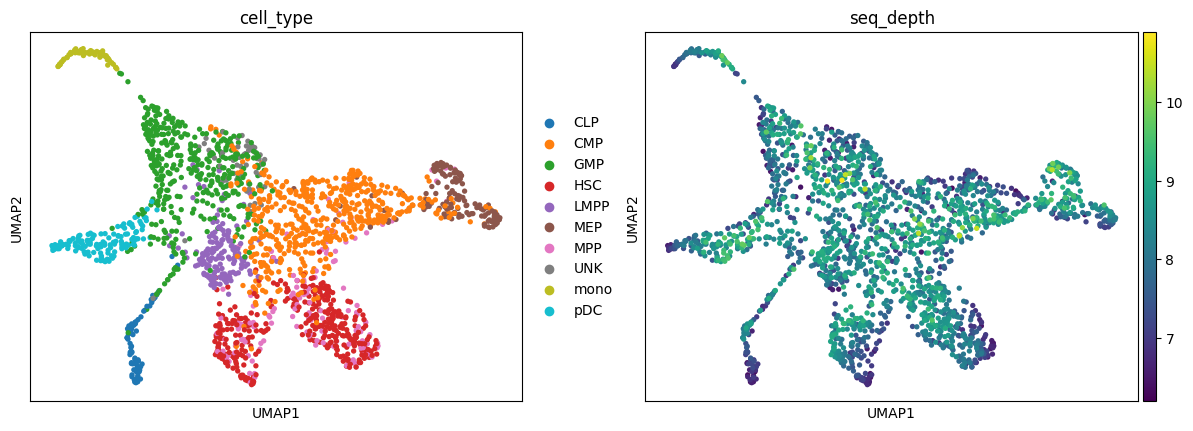

In [7]:
epi.pl.umap(data_imputed,color = ["cell_type","seq_depth"])

## Run scCASE to correct sequencing depth 

Raw data shows strong effect by sequencing depth.

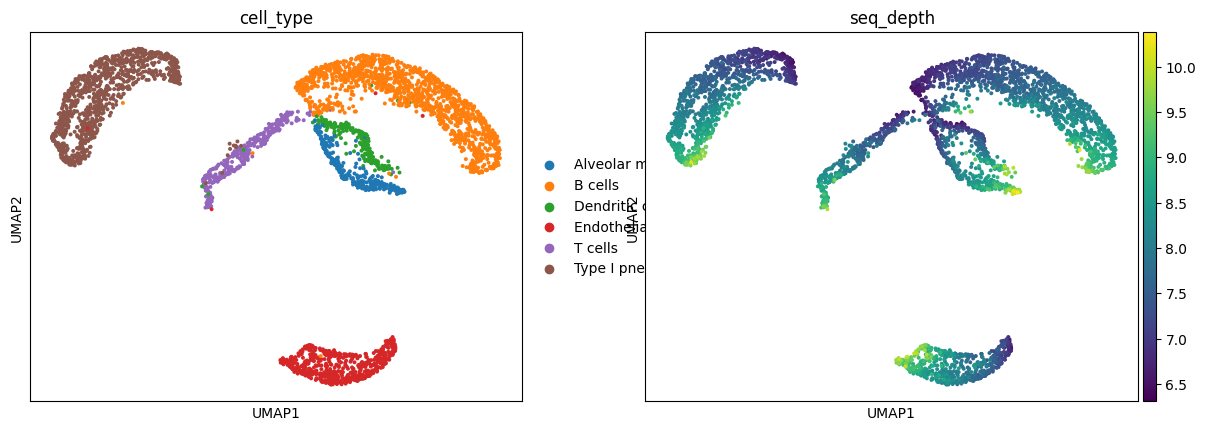

In [5]:
adata = epi.read("/home/sccasimp/data/sccasimp/LungA/origdata.h5ad")
seq_depth = np.sum(adata.X>0,axis = 1)
adata.obs["seq_depth"] = np.log(seq_depth)
scCASE.lazy(adata)
epi.pl.umap(adata,color = ["cell_type","seq_depth"])

Utilize scCASE with parameter "method= 'Correct seq depth'" to enhance data.

In [ ]:
data_imputed = scCASE.run("/home/sccasimp/data/sccasimp/LungA/origdata.h5ad",data_format="h5ad",K=15,method= "Correct seq depth")
data_imputed.obs["seq_depth"] = np.log(seq_depth)

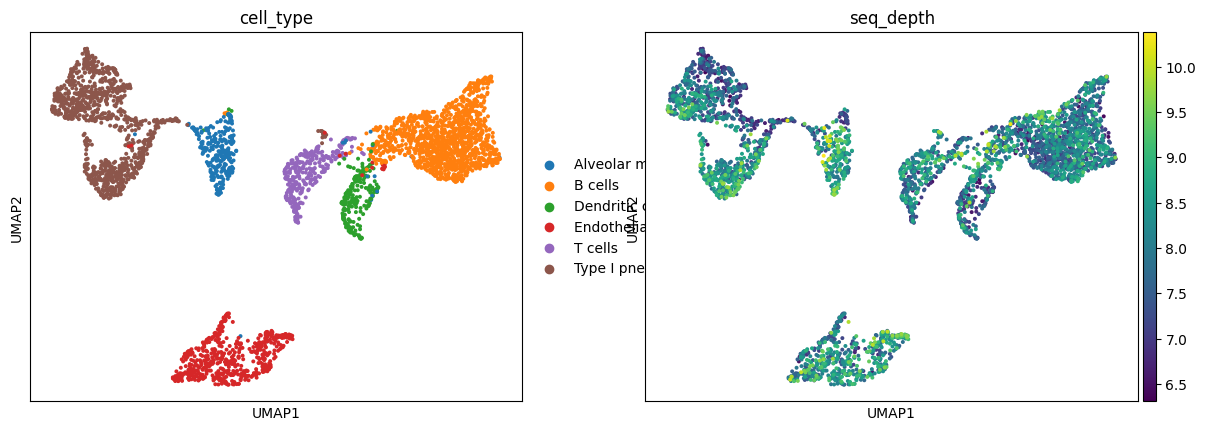

In [7]:
scCASE.lazy(data_imputed)
epi.pl.umap(data_imputed,color = ["cell_type","seq_depth"])